In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split,KFold

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_file=r'R:\DataScience\Python\Finacus_Data\Data\Data\train.csv'
train=pd.read_csv(data_file)

data_file1=r'R:\DataScience\Python\Finacus_Data\Data\Data\Geo_scores.csv'
Geo_scores=pd.read_csv(data_file1)

data_file2=r'R:\DataScience\Python\Finacus_Data\Data\Data\instance_scores.csv'
instance_scores=pd.read_csv(data_file2)

data_file3=r'R:\DataScience\Python\Finacus_Data\Data\Data\Lambda_wts.csv'
Lambda_wts=pd.read_csv(data_file3)

data_file4=r'R:\DataScience\Python\Finacus_Data\Data\Data\Qset_tats.csv'
Qset_tats=pd.read_csv(data_file4)

data_file5=r'R:\DataScience\Python\Finacus_Data\Data\Data\test_share.csv'
test_share=pd.read_csv(data_file5)



In [3]:
train["Flag"]="train"

In [4]:
test_share["Flag"]="test"

In [5]:
data=pd.concat([train, test_share])

In [6]:
data["Flag"].value_counts()

train    227845
test      56962
Name: Flag, dtype: int64

In [7]:
Geo_scores['geo_score'].value_counts().isnull().sum()

0

In [8]:
instance_scores['instance_scores'].value_counts().isnull().sum()

0

In [9]:
Qset_tats['qsets_normalized_tat'].value_counts().isnull().sum()

0

In [10]:
Lambda_wts['lambda_wt'].value_counts().isnull().sum()

0

In [11]:
Geo_unique=Geo_scores.groupby('id',as_index=False)[['geo_score']].mean()
Geo_unique.head()

,id,geo_score
0,0,-0.6200
1,1,1.3375
2,2,0.0700
3,3,0.1800
4,4,0.5400


In [12]:
Instance_unique=round(instance_scores.groupby("id",as_index=False)[["instance_scores"]].mean(),2)
Instance_unique.head()

,id,instance_scores
0,0,0.09
1,1,-0.17
2,2,0.21
3,3,-0.05
4,4,0.75


In [13]:
Qset_unique=round(Qset_tats.groupby("id",as_index=False)[["qsets_normalized_tat"]].mean(),2)
Qset_unique.head()

,id,qsets_normalized_tat
0,0,0.26
1,1,-0.11
2,2,1.11
3,3,-0.85
4,4,-0.24


In [14]:
Lambda_unique=round(Lambda_wts.groupby("Group",as_index=False)[["lambda_wt"]].mean(),2)
Lambda_unique.head()

,Group,lambda_wt
0,Grp0,-0.31
1,Grp1,-0.14
2,Grp10,0.36
3,Grp100,-0.25
4,Grp1000,-13.91


In [15]:
data=pd.merge(data, Geo_unique, on='id', how='left')

In [16]:
data.shape

(284807, 30)

In [17]:
data=pd.merge(data, Instance_unique, on='id', how='left')

In [18]:
data.shape

(284807, 31)

In [19]:
data=pd.merge(data, Qset_unique, on='id', how='left')

In [20]:
data.shape

(284807, 32)

In [21]:
data=pd.merge(data, Lambda_unique, on='Group', how='left')

In [22]:
data.shape

(284807, 33)

In [23]:
data.dtypes

Cred1                   float64
Cred2                   float64
Cred3                   float64
Cred4                   float64
Cred5                   float64
Cred6                   float64
Dem1                    float64
Dem2                    float64
Dem3                    float64
Dem4                    float64
Dem5                    float64
Dem6                    float64
Dem7                    float64
Dem8                    float64
Dem9                    float64
Flag                     object
Group                    object
Normalised_FNT          float64
Per1                    float64
Per2                    float64
Per3                    float64
Per4                    float64
Per5                    float64
Per6                    float64
Per7                    float64
Per8                    float64
Per9                    float64
Target                  float64
id                        int64
geo_score               float64
instance_scores         float64
qsets_no

In [24]:
data.isna().any().sum()

1

In [25]:
Training_data=data.loc[data['Flag'] == 'train']
Testing_data=data.loc[data['Flag'] == 'test']

In [ ]:
Training_data.shape

In [ ]:
Testing_data.shape

In [26]:
from sklearn.decomposition import PCA,FactorAnalysis
from sklearn.preprocessing import scale

In [27]:
Training_data=Training_data.drop(["Flag","id","Group"],1)

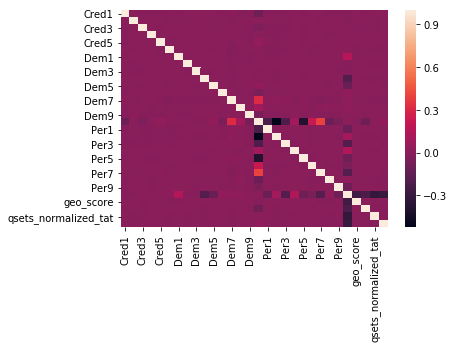

In [28]:
import seaborn as sns
%matplotlib inline
sns.heatmap(Training_data.corr())

In [29]:
X=Training_data.copy()
X=scale(X)

In [30]:
pca=PCA(n_components=29)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=29, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
pca.components_

array([[-6.52090541e-02,  2.31831168e-03, -2.38499643e-02,
         4.33632198e-03,  3.55788561e-02,  2.00606977e-03,
         3.64579992e-03,  1.91674161e-03, -5.40517038e-04,
        -2.60626107e-03,  2.20347687e-02, -3.69312881e-02,
         2.15364416e-01,  6.72040187e-02, -4.08056186e-02,
         7.09876385e-01, -1.69372390e-01, -3.89990303e-01,
        -1.58949092e-01,  7.45263430e-02, -3.00370880e-01,
         1.70103782e-01,  3.00775769e-01, -7.95135903e-02,
        -3.47751622e-02,  1.51807155e-02, -1.44876219e-02,
        -7.77612306e-02, -3.05189226e-03,  1.65214387e-02],
       [-4.44579987e-03, -6.11614134e-03,  7.23806792e-03,
         1.55244108e-03,  2.08180473e-03,  1.30922065e-02,
         1.43988367e-01, -4.22244864e-03, -6.37249838e-03,
        -1.90506931e-01, -1.13326938e-01,  3.36882124e-02,
         2.27880339e-02,  1.07539496e-02,  7.10415199e-03,
        -1.30797120e-02, -1.04118181e-01,  1.07309294e-01,
        -1.94281485e-01,  1.29441815e-01, -9.81012460e-

In [32]:
var=pca.explained_variance_ratio_
print(var)

[0.06462991 0.05728631 0.03465394 0.03457401 0.03390982 0.03365748
 0.0335195  0.03349524 0.03348512 0.03346472 0.03342578 0.03339831
 0.03338545 0.03335353 0.03333506 0.03331007 0.03327837 0.0332452
 0.03322991 0.03319636 0.03317741 0.03315566 0.03311269 0.0330653
 0.03291872 0.03285733 0.03249153 0.03242296 0.00951695]


In [33]:
var_cum=np.cumsum(np.round(var,decimals=4)*100)
print(var_cum)

[ 6.46 12.19 15.66 19.12 22.51 25.88 29.23 32.58 35.93 39.28 42.62 45.96
 49.3  52.64 55.97 59.3  62.63 65.95 69.27 72.59 75.91 79.23 82.54 85.85
 89.14 92.43 95.68 98.92 99.87]


In [34]:
pca=PCA(n_components=29)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=29, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
X1=pd.DataFrame(pca.transform(X))
X1.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.368308,-0.121764,-0.264773,0.158526,0.057890,-0.498618,0.075798,-0.458249,-0.030778,1.532560,...,0.635497,-1.023434,-0.438112,-0.009101,0.553522,-0.599831,-0.088275,0.241185,-0.055187,-0.068687
1,-0.544664,-0.014191,0.242661,-0.292890,0.356839,-0.714649,-1.311593,0.028683,-0.699036,0.005902,...,-0.225827,-0.717546,0.510664,0.901841,1.223565,0.625137,-0.212912,-0.188722,-0.491670,-0.002234
2,-0.078233,-0.108520,-0.321621,0.183005,-0.133157,0.976648,-0.681132,0.439696,1.697727,0.574524,...,-0.183701,0.232166,-0.271956,-0.960584,0.610446,-2.698017,0.546878,0.041797,-0.013877,-0.042500
3,-0.426747,0.002614,-0.281747,0.003037,0.857388,-0.044145,-0.302323,0.936403,-1.275785,-0.605090,...,-1.149416,1.052161,-1.103274,0.368931,-0.514538,0.159334,-0.807983,-0.702332,-0.588997,0.076855
4,-0.464373,-0.106737,0.029313,-0.149565,0.288354,-0.809190,0.507980,-0.150961,0.431390,-0.195686,...,-1.199335,1.151856,0.592886,-0.283879,-0.244656,0.776137,0.119349,-0.225887,-0.363721,-0.077346


In [36]:
loadings=pca.components_[0]
loadings

array([-6.52090541e-02,  2.31831168e-03, -2.38499643e-02,  4.33632198e-03,
        3.55788561e-02,  2.00606977e-03,  3.64579992e-03,  1.91674161e-03,
       -5.40517038e-04, -2.60626107e-03,  2.20347687e-02, -3.69312881e-02,
        2.15364416e-01,  6.72040187e-02, -4.08056186e-02,  7.09876385e-01,
       -1.69372390e-01, -3.89990303e-01, -1.58949092e-01,  7.45263430e-02,
       -3.00370880e-01,  1.70103782e-01,  3.00775769e-01, -7.95135903e-02,
       -3.47751622e-02,  1.51807155e-02, -1.44876219e-02, -7.77612306e-02,
       -3.05189226e-03,  1.65214387e-02])

In [37]:
list(zip(Training_data.columns,loadings))

[('Cred1', -0.06520905412139413),
 ('Cred2', 0.0023183116835401307),
 ('Cred3', -0.02384996425563346),
 ('Cred4', 0.004336321980075247),
 ('Cred5', 0.03557885608391866),
 ('Cred6', 0.0020060697656301817),
 ('Dem1', 0.003645799917159891),
 ('Dem2', 0.0019167416098245303),
 ('Dem3', -0.0005405170376166291),
 ('Dem4', -0.0026062610678118736),
 ('Dem5', 0.0220347686791304),
 ('Dem6', -0.03693128810478608),
 ('Dem7', 0.21536441578793625),
 ('Dem8', 0.06720401872870167),
 ('Dem9', -0.040805618592318446),
 ('Normalised_FNT', 0.7098763848573273),
 ('Per1', -0.16937239047606575),
 ('Per2', -0.38999030272891877),
 ('Per3', -0.1589490922593039),
 ('Per4', 0.07452634299290879),
 ('Per5', -0.3003708804351012),
 ('Per6', 0.17010378188891515),
 ('Per7', 0.30077576871928124),
 ('Per8', -0.0795135902780176),
 ('Per9', -0.03477516217933313),
 ('Target', 0.015180715476601683),
 ('geo_score', -0.014487621911872943),
 ('instance_scores', -0.07776123057824959),
 ('qsets_normalized_tat', -0.00305189225650495

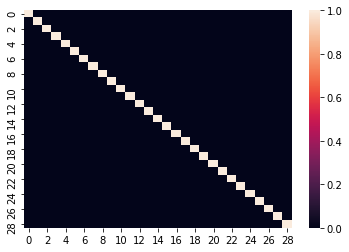

In [38]:
sns.heatmap(X1.corr())

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

In [ ]:
xgb_params={'n_estimators':[100,200,300,500,700,1000],
            'gamma':[i/10.0 for i in range(0,5)],
            'learning_rate':[0.01,0.05,0.1,0.3,0.5],
          'max_depth':[2,3,4,5,6,7,8],
          'min_child_weight':[1,2,5,10],
          'max_delta_step':[0,1,2,5,10],
          'subsample':[i/10.0 for i in range(5,10)],
          'colsample_bytree':[i/10.0 for i in range(5,10)],
          'colsample_bylevel':[i/10.0 for i in range(5,10)],
          'reg_lambda':[1e-5,1e-2,0.1,1,100],
          'reg_alpha':[1e-5,1e-2,0.1,1,100],
          'scale_pos_weight':[1,2,3,4,5,6,7,8,9],
          
            
        }



In [ ]:
xgb=XGBClassifier(objective='binary:logistic')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(xgb,scoring='roc_auc',param_distributions=xgb_params,cv=10,n_iter=1,n_jobs=-1)

In [ ]:
bd_train, bd_test = train_test_split(Training_data, test_size = 0.2,random_state=2)

x_train=bd_train.drop(["Target"],1)
y_train=bd_train["Target"]

x_test=bd_test.drop(["Target"],1)
y_test=bd_test["Target"]

In [ ]:
random_search.fit(x_train,y_train)

In [ ]:
def report(results,n_top=3):
    for i in range(1,n_top + 1):
        candidate=np.flatnonzero(results[rank_test_score]==i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [ ]:
xgb_predict=random_search.predict(x_test)
accuracy_score(y_test,xgb_predict)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,xgb_predict)

In [ ]:
x_Test_Share=Testing_data.drop(["Target","Flag","Group","id"],1)
y_Test_Share=Testing_data["Target"]

In [ ]:
y_Test_Share_predicted=random_search.predict(x_Test_Share)

In [ ]:
submission = pd.DataFrame({'id':Testing_data['id'],'Target':y_Test_Share_predicted})
submission.head()

In [ ]:
filename = 'R:\DataScience\Python\Finacus_Data\Data\Data\Finacus Prediction.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)